# Dynamic price Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Rides_1L.csv")

In [3]:
df.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,long_summary,humidity,pressure
0,1545085210,22,17,12,17-12-2018,America/New_York,Northeastern University,Theatre District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.0,1.89,1.0,39.75,Light rain in the morning.,0.73,1000.26
1,1543366102,0,28,11,28-11-2018,America/New_York,Northeastern University,Theatre District,Lyft,lyft_plus,Lyft XL,13.5,1.97,1.0,39.13,Light rain in the morning.,0.73,991.99
2,1543701476,21,1,12,01-12-2018,America/New_York,Beacon Hill,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.35,1.0,40.20,Light rain in the morning and overnight.,0.65,1023.13
3,1544793612,13,14,12,14-12-2018,America/New_York,Haymarket Square,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.91,1.0,30.58,Partly cloudy throughout the day.,0.80,1034.26
4,1544851211,5,15,12,15-12-2018,America/New_York,North End,West End,Lyft,lyft_premier,Lux,13.5,1.23,1.0,45.18,Mostly cloudy throughout the day.,0.93,1022.76


In [4]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure'],
      dtype='object')

In [5]:
df.shape

(100000, 18)

In [6]:
df.tail()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,long_summary,humidity,pressure
99995,1544694910,9,13,12,13-12-2018,America/New_York,Fenway,Back Bay,Lyft,lyft_line,Shared,5.0,1.48,1.0,20.23,Partly cloudy throughout the day.,0.66,1030.65
99996,1545011405,1,17,12,17-12-2018,America/New_York,Financial District,South Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,0.39,1.0,40.61,Rain throughout the day.,0.91,1011.49
99997,1543257493,18,26,11,26-11-2018,America/New_York,Boston University,Financial District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,36.0,4.74,1.0,45.46,"Rain until morning, starting again in the eve...",0.86,1011.31
99998,1544881510,13,15,12,15-12-2018,America/New_York,Fenway,Back Bay,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.0,1.50,1.0,47.56,Mostly cloudy throughout the day.,0.90,1022.68
99999,1543447569,23,28,11,28-11-2018,America/New_York,Back Bay,Northeastern University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.22,1.0,39.35,Mostly cloudy throughout the day.,0.69,995.30


In [7]:
df.dtypes

timestamp             int64
hour                  int64
day                   int64
month                 int64
datetime             object
timezone             object
source               object
destination          object
cab_type             object
product_id           object
name                 object
price               float64
distance            float64
surge_multiplier    float64
temperature         float64
long_summary         object
humidity            float64
pressure            float64
dtype: object

In [8]:
df_base=df.copy()

In [9]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure'],
      dtype='object')

# data cleaninig

In [10]:
df.isnull().sum()

timestamp              0
hour                   0
day                    0
month                  0
datetime               0
timezone               0
source                 0
destination            0
cab_type               0
product_id             0
name                   0
price               7898
distance               0
surge_multiplier       0
temperature            0
long_summary           0
humidity               0
pressure               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(34)

In [12]:
print(df.shape)
df=df.drop_duplicates()
df.duplicated().sum()
print(df.shape)

(100000, 18)
(99966, 18)


In [13]:
df.dropna(subset=['price'],inplace=True)
df.shape

(92083, 18)

In [14]:
df.isnull().sum()

timestamp           0
hour                0
day                 0
month               0
datetime            0
timezone            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
temperature         0
long_summary        0
humidity            0
pressure            0
dtype: int64

In [15]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,temperature,humidity,pressure
count,9.208300e+04,92083.00000,92083.000000,92083.000000,92083.000000,92083.000000,92083.000000,92083.000000,92083.000000,92083.000000
mean,1.544053e+09,11.63623,17.807826,11.587546,16.506801,2.182340,1.014272,39.562989,0.740460,1010.099317
std,7.076506e+05,6.96049,9.960751,0.492279,9.315988,1.134382,0.092054,6.729399,0.138835,13.460395
min,1.543204e+09,0.00000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,988.090000
25%,1.543445e+09,6.00000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,999.840000
50%,1.543738e+09,12.00000,17.000000,12.000000,13.500000,2.150000,1.000000,40.490000,0.710000,1009.250000
75%,1.544831e+09,18.00000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,1021.860000
max,1.550000e+09,23.00000,30.000000,12.000000,92.000000,7.860000,3.000000,57.220000,0.960000,1035.550000


In [16]:
df['distance'].describe()

count    92083.000000
mean         2.182340
std          1.134382
min          0.020000
25%          1.270000
50%          2.150000
75%          2.930000
max          7.860000
Name: distance, dtype: float64

In [17]:
df[df['distance']<0].head(1)

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,long_summary,humidity,pressure


In [18]:
s=  df['source'].value_counts()
d=  df['destination'].value_counts()
ct= df['cab_type'].value_counts()
n=  df['name'].value_counts()
print(pd.concat([s,d,ct,n],axis=1))


                          count   count    count   count
Financial District       7950.0  7824.0      NaN     NaN
Theatre District         7776.0  7549.0      NaN     NaN
Back Bay                 7715.0  7718.0      NaN     NaN
Beacon Hill              7714.0  7540.0      NaN     NaN
Haymarket Square         7674.0  7834.0      NaN     NaN
Fenway                   7672.0  7664.0      NaN     NaN
Northeastern University  7659.0  7624.0      NaN     NaN
West End                 7655.0  7675.0      NaN     NaN
Boston University        7618.0  7705.0      NaN     NaN
South Station            7611.0  7814.0      NaN     NaN
North End                7548.0  7660.0      NaN     NaN
North Station            7491.0  7476.0      NaN     NaN
Uber                        NaN     NaN  47606.0     NaN
Lyft                        NaN     NaN  44477.0  7419.0
UberPool                    NaN     NaN      NaN  7993.0
UberX                       NaN     NaN      NaN  7986.0
WAV                         NaN

In [19]:
df_clean=df.copy()

# EDA....

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

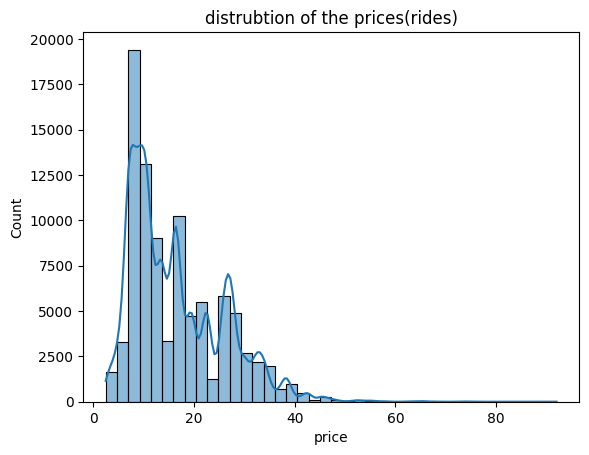

In [21]:
sns.histplot(df_clean['price'],kde=True,bins=40)
plt.title("distrubtion of the prices(rides)")
plt.show()

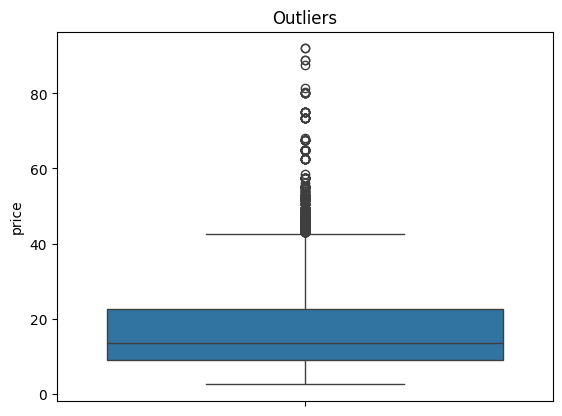

In [22]:
sns.boxplot(y=df_clean['price'])
plt.title("Outliers")
plt.show()

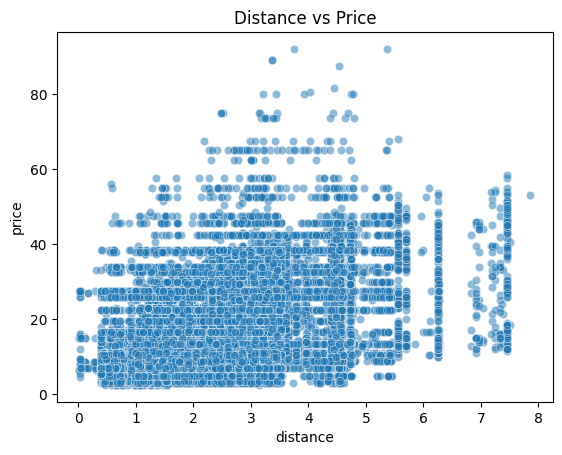

In [23]:
sns.scatterplot(
    data=df_clean,
    x="distance",
    y="price",
    alpha=0.5
)
plt.title("Distance vs Price")
plt.show()

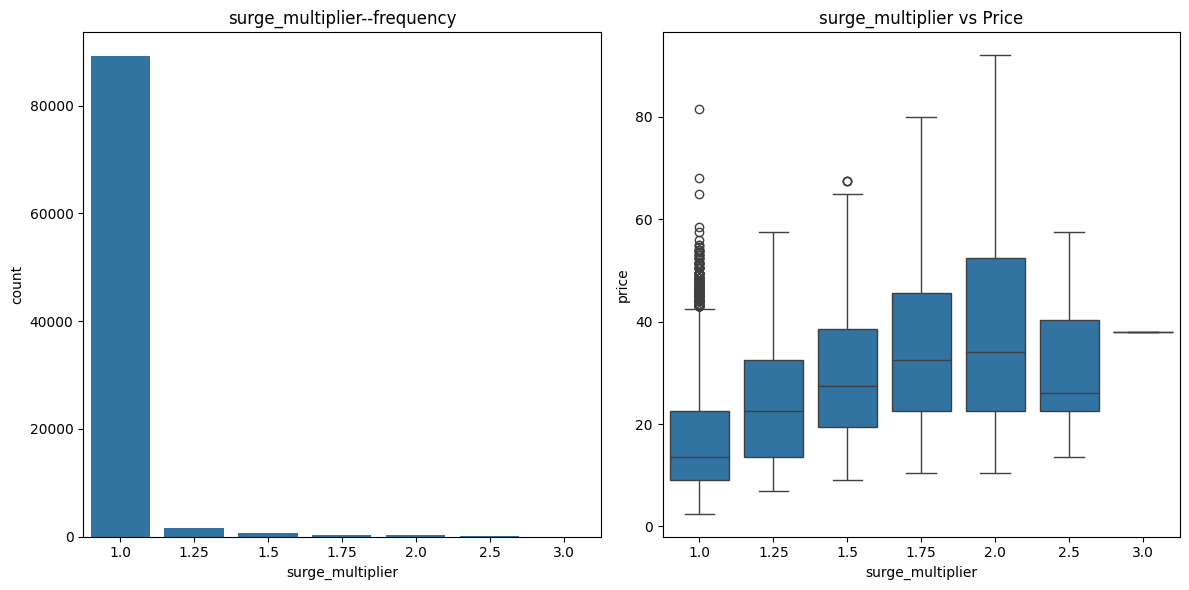

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.countplot(
    data=df_clean,
    x='surge_multiplier'
)
plt.title("surge_multiplier--frequency")
plt.subplot(1,2,2)
sns.boxplot(
    data=df_clean,
    x="surge_multiplier",
    y="price"
)
plt.title("surge_multiplier vs Price")
plt.tight_layout()
plt.show()

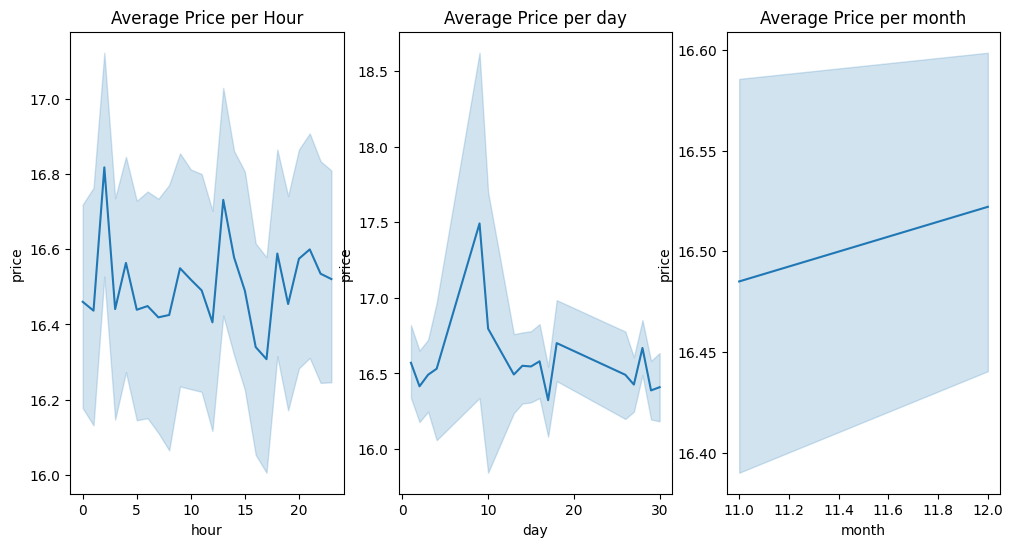

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.lineplot(
    data=df_clean,
    x="hour",
    y="price",
    estimator="mean"
)
plt.title("Average Price per Hour")

plt.subplot(1,3,2)
sns.lineplot(
    data=df_clean,
    x="day",
    y="price",
    estimator="mean"
)
plt.title("Average Price per day")

plt.subplot(1,3,3)
sns.lineplot(
    data=df_clean,
    x="month",
    y="price"
)
plt.title("Average Price per month")
plt.show()



In [26]:
df.columns


Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure'],
      dtype='object')

In [27]:
df['long_summary'].value_counts()

long_summary
Mostly cloudy throughout the day.                      26844
Partly cloudy throughout the day.                      19321
Light rain in the morning.                             13696
Rain throughout the day.                                7306
Light rain in the morning and overnight.                6733
Rain until morning, starting again in the evening.      6330
Foggy in the morning.                                   5896
Light rain until evening.                               4642
Overcast throughout the day.                            1009
Possible drizzle in the morning.                         246
Rain in the morning and afternoon.                        60
Name: count, dtype: int64

### extracting the Rain(1/0) from description

In [28]:
## df['is_rain']=np.where(df['long_summary'].str.lower().str.contains("rain"),1,0)
df_clean.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure'],
      dtype='object')

In [29]:
df['is_rain']=np.where(df_clean['long_summary'].str.lower().str.contains("rain"),1,0)

In [30]:

print(df.columns)
df['is_rain'].value_counts()
df_clean=df.copy()

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure', 'is_rain'],
      dtype='object')


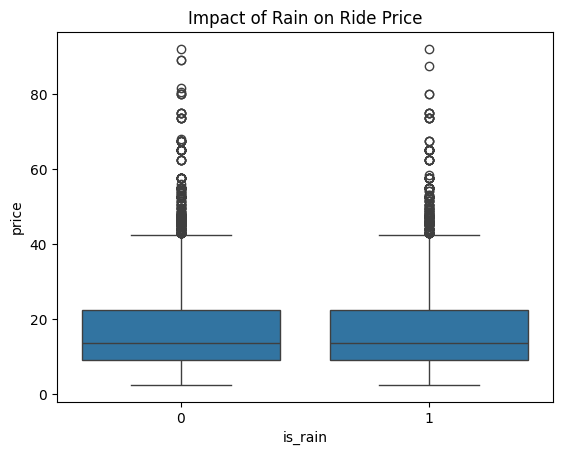

In [31]:
sns.boxplot(
    data=df_clean,
    x='is_rain',
    y="price"
)
## plt.xticks([0, 1], ["No Rain", "Rain"])
plt.title("Impact of Rain on Ride Price")
plt.show()

In [32]:
df.shape

(92083, 19)

In [33]:
df_stage4=df.copy()

In [34]:
df_long_summary=df['long_summary']
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'long_summary', 'humidity',
       'pressure', 'is_rain'],
      dtype='object')

## Feature extraction

In [35]:
df_fe=df.drop(columns=['timestamp','datetime','timezone','product_id','long_summary'])
df_fe = df_fe.reset_index(drop=True)

In [36]:
df_fe.head(2)
y=df_fe["price"]

In [37]:
df_fe.dtypes

hour                  int64
day                   int64
month                 int64
source               object
destination          object
cab_type             object
name                 object
price               float64
distance            float64
surge_multiplier    float64
temperature         float64
humidity            float64
pressure            float64
is_rain               int64
dtype: object

In [38]:
df_fe.dtypes

hour                  int64
day                   int64
month                 int64
source               object
destination          object
cab_type             object
name                 object
price               float64
distance            float64
surge_multiplier    float64
temperature         float64
humidity            float64
pressure            float64
is_rain               int64
dtype: object

In [39]:
category_cols=['source','destination','cab_type','name']
df_fe[category_cols]=df_fe[category_cols].astype("category")

In [40]:
df_fe.dtypes

hour                   int64
day                    int64
month                  int64
source              category
destination         category
cab_type            category
name                category
price                float64
distance             float64
surge_multiplier     float64
temperature          float64
humidity             float64
pressure             float64
is_rain                int64
dtype: object

In [41]:
df_fe.head(3)
print(df_fe.columns)

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature', 'humidity',
       'pressure', 'is_rain'],
      dtype='object')


In [42]:
x=df_fe.copy()

In [43]:
num_cols = x.select_dtypes(include=['number']).columns
print(num_cols)
print(category_cols)

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'humidity', 'pressure', 'is_rain'],
      dtype='object')
['source', 'destination', 'cab_type', 'name']


In [44]:
from sklearn.preprocessing import OneHotEncoder
one_hot_fn = OneHotEncoder(
    handle_unknown="ignore", 
    sparse_output=False
)

In [45]:
x_cat_encoded=one_hot_fn.fit_transform(x[category_cols])
x_cat_encoded.shape

(92083, 38)

In [46]:
x_num=x[num_cols]
x_num.shape

(92083, 10)

In [47]:
## x_final=pd.concat([x_cat_encoded,x_num])
x_final = np.column_stack([x_cat_encoded, x_num])
print(x_final.shape)
y_final=y.copy()
y_final.shape
x_final.shape
df_fe = df_fe.reset_index(drop=True)

(92083, 48)


## converting the sklear one hot encodnig Features into data frame and combining both numerical nad categorical_encoded fd's

In [48]:
print(x_cat_encoded.shape)
x_cat_encoded_df=pd.DataFrame(
    x_cat_encoded,
    columns=one_hot_fn.get_feature_names_out()
)
x_cat_encoded_df.columns

x_cat_encoded_df.shape


(92083, 38)


(92083, 38)

In [49]:
x_num.shape

(92083, 10)

In [50]:
x_num=x_num.reset_index(drop=True)
x_cat_encoded_df=x_cat_encoded_df.reset_index(drop=True)
df_final=pd.concat([x_cat_encoded_df,x_num],axis=1)
df_final=df_final.reset_index(drop=True)

In [51]:
df_final.to_csv("final_endcoded_feture_rides.csv")

In [52]:
X=df_final.drop("price",axis=1)
Y=df_fe["price"]
print(f"shape fo both {X.shape,Y.shape}")


shape fo both ((92083, 47), (92083,))



# Train_test Split 

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
    X,
    Y,
    test_size=0.8,
    random_state=42
    )
X.head(2)

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_WAV,hour,day,month,distance,surge_multiplier,temperature,humidity,pressure,is_rain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,22,17,12,1.89,1.0,39.75,0.73,1000.26,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,28,11,1.97,1.0,39.13,0.73,991.99,1


## scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## training

In [55]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
y_pred=lr_model.predict(X_test_scaled)

### results

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2=r2_score(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
print(f"mae = {mae}\nmse={mse}\nr2={r2}")


mae = 1.7417888895986824
mse=6.191033635800184
r2=0.9285956188293936


## Error.. Analysis

In [58]:
Y_train_pred=lr_model.predict(X_train_scaled)
r2_train=r2_score(Y_train,Y_train_pred)

print("r2_train",r2_train)
print("r2_test",r2)

r2_train 0.9294807344208758
r2_test 0.9285956188293936


### plot of y and y^

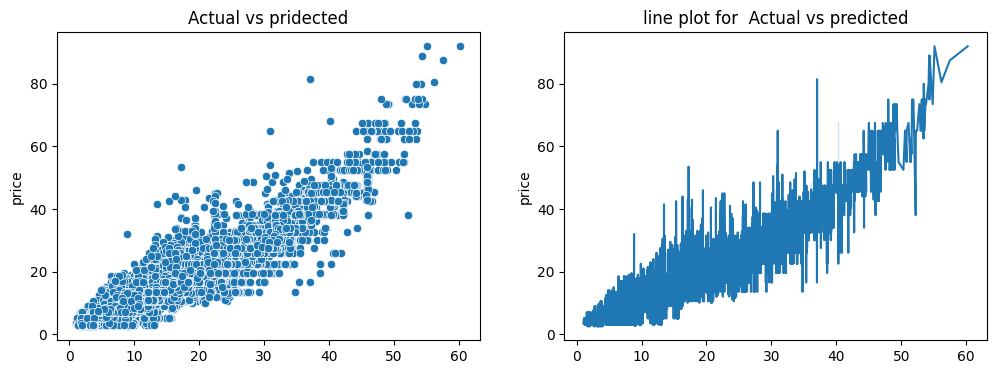

In [74]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(
    x=y_pred,
    y=Y_test,
)
## plt.xlable("Actual price")
## plt.ylabel("prideicted values on test data test")
plt.title("Actual vs pridected")

plt.subplot(1,2,2)
sns.lineplot(
     x=y_pred,
     y=Y_test,
) 
plt.title("line plot for  Actual vs predicted")
plt.show()

### residual Errors

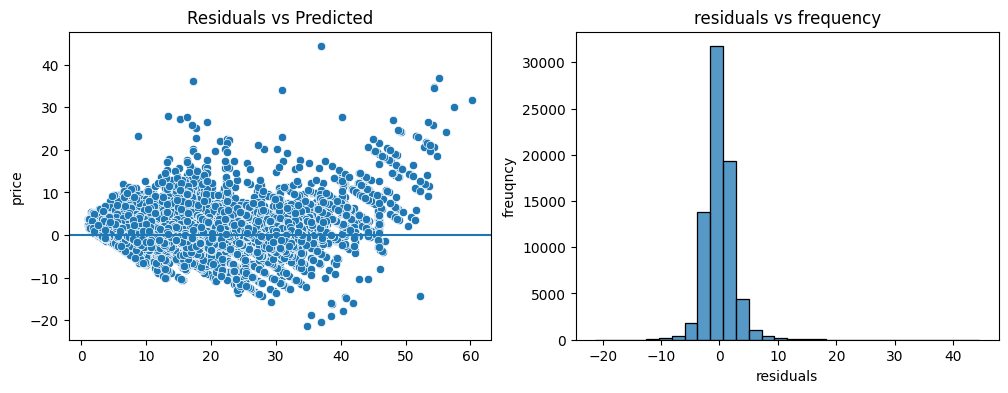

In [73]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
residuals=Y_test-y_pred
sns.scatterplot(
    x=y_pred,
    y=residuals
)
plt.axhline(0)

plt.title("Residuals vs Predicted")
plt.subplot(1,2,2)
sns.histplot(
    residuals,
    bins =30
)
plt.xlabel("residuals")
plt.ylabel("freuqncy")
plt.title("residuals vs frequency")
plt.show()

## Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)    

In [80]:
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_test_rf_pred=rf_model.predict(X_test)

#### evaulation

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae_rf=mean_absolute_error(Y_test,y_test_rf_pred)
mse_rf=mean_squared_error(Y_test,y_test_rf_pred)
r2_score_rf=r2_score(Y_test,y_test_rf_pred)

#### Results

In [93]:
print("mae_rf",mae_rf)
print("mse_rf",mse_rf)
print("r2_score_rf",r2_score_rf)

mae_rf 1.2042598643164941
mse_rf 3.4719210915912115
r2_score_rf 0.9599565449645301


### checking the R2_score on train data set 

In [97]:
rf_pred_train=rf_model.predict(X_train)
r2_score_rf_train=r2_score(rf_pred_train,Y_train)
print("r2_score_rf_test",r2_score_rf)
print("r2_score_rf_train",r2_score_rf_train)

r2_score_rf_test 0.9599565449645301
r2_score_rf_train 0.9939398573316134
